In [31]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier,  kneighbors_graph
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("final_filter_DF.csv")
df

,AGE,PTEDUCAT,FDG,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_perc_forgetting,...,FSVERSION,IMAGEUID,Hippocampus,mPACCdigit,mPACCtrailsB,FAQTOTAL,ID_faq,ID_neurobat,ADNI_MEM,DX_bl
0,74.3,16,1.336150,0.0,10.67,18.67,5.0,28.0,44.0,54.5455,...,2,3.547500e+04,8336.000000,-4.310280,-4.114430,0.0,4.0,30.0,0.405,0
1,81.3,18,1.108600,4.5,22.00,31.00,8.0,20.0,22.0,100.0000,...,2,3.223700e+04,5319.000000,-16.244900,-15.829900,10.0,8.0,36.0,-1.021,4
2,67.5,10,1.198979,1.0,14.33,21.33,6.0,27.0,37.0,36.3636,...,2,6.463100e+04,6869.000000,-8.421500,-9.449350,0.0,30.0,140.0,-0.009,2
3,73.7,16,1.259560,0.0,8.67,14.67,4.0,29.0,37.0,44.4444,...,2,3.224600e+04,7075.000000,-1.888680,-1.565830,0.0,6.0,32.0,0.743,0
4,80.4,13,1.198979,0.5,18.67,25.67,7.0,25.0,30.0,83.3333,...,2,3.302500e+04,5348.000000,-10.141700,-10.910900,0.0,44.0,182.0,-0.219,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,65.6,17,1.198979,0.0,0.67,0.67,0.0,30.0,59.0,0.0000,...,1,1.633742e+06,7717.300000,5.427020,5.167270,3.0,170293.0,170226.0,2.978,3
2415,61.4,12,1.198979,3.5,20.33,31.33,9.0,28.0,22.0,85.7143,...,3,4.356456e+05,6929.112247,-10.780300,-11.308700,15.0,170102.0,170105.0,-0.844,2
2416,64.6,12,1.198979,0.5,16.33,23.33,7.0,27.0,31.0,75.0000,...,3,4.356456e+05,6929.112247,-9.659400,-7.517550,0.0,171173.0,171669.0,-0.232,2
2417,68.9,18,1.198979,0.5,5.00,7.00,2.0,30.0,45.0,38.4615,...,3,4.356456e+05,6929.112247,2.742450,2.540260,0.0,173878.0,173872.0,1.392,1


In [17]:
X = df.drop(columns=['DX_bl'])
y = df['DX_bl']

In [18]:
display(X), display(y)

,AGE,PTEDUCAT,FDG,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_perc_forgetting,...,FLDSTRENG,FSVERSION,IMAGEUID,Hippocampus,mPACCdigit,mPACCtrailsB,FAQTOTAL,ID_faq,ID_neurobat,ADNI_MEM
0,74.3,16,1.336150,0.0,10.67,18.67,5.0,28.0,44.0,54.5455,...,0,2,3.547500e+04,8336.000000,-4.310280,-4.114430,0.0,4.0,30.0,0.405
1,81.3,18,1.108600,4.5,22.00,31.00,8.0,20.0,22.0,100.0000,...,0,2,3.223700e+04,5319.000000,-16.244900,-15.829900,10.0,8.0,36.0,-1.021
2,67.5,10,1.198979,1.0,14.33,21.33,6.0,27.0,37.0,36.3636,...,0,2,6.463100e+04,6869.000000,-8.421500,-9.449350,0.0,30.0,140.0,-0.009
3,73.7,16,1.259560,0.0,8.67,14.67,4.0,29.0,37.0,44.4444,...,0,2,3.224600e+04,7075.000000,-1.888680,-1.565830,0.0,6.0,32.0,0.743
4,80.4,13,1.198979,0.5,18.67,25.67,7.0,25.0,30.0,83.3333,...,0,2,3.302500e+04,5348.000000,-10.141700,-10.910900,0.0,44.0,182.0,-0.219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,65.6,17,1.198979,0.0,0.67,0.67,0.0,30.0,59.0,0.0000,...,2,1,1.633742e+06,7717.300000,5.427020,5.167270,3.0,170293.0,170226.0,2.978
2415,61.4,12,1.198979,3.5,20.33,31.33,9.0,28.0,22.0,85.7143,...,2,3,4.356456e+05,6929.112247,-10.780300,-11.308700,15.0,170102.0,170105.0,-0.844
2416,64.6,12,1.198979,0.5,16.33,23.33,7.0,27.0,31.0,75.0000,...,2,3,4.356456e+05,6929.112247,-9.659400,-7.517550,0.0,171173.0,171669.0,-0.232
2417,68.9,18,1.198979,0.5,5.00,7.00,2.0,30.0,45.0,38.4615,...,2,3,4.356456e+05,6929.112247,2.742450,2.540260,0.0,173878.0,173872.0,1.392


0       0
1       4
2       2
3       0
4       2
       ..
2414    3
2415    2
2416    2
2417    1
2418    2
Name: DX_bl, Length: 2419, dtype: int64

(None, None)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(1935, 35) (484, 35)


## Train models

#### Neural Network

In [57]:
#Neural Network structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(35, 64)   # Input layer
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 64)   # Hidden layer
        self.dropout2 = nn.Dropout(0.2)
        self.out = nn.Linear(64, 5)# Output layer

    def forward(self, x):
        x = F.normalize(x)              # Optional: normalize inputs
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        return self.out(x)

Epoch 1, Train Loss: 1.6197, Val Loss: 1.6152
Epoch 2, Train Loss: 1.6160, Val Loss: 1.6114
Epoch 3, Train Loss: 1.6121, Val Loss: 1.6076
Epoch 4, Train Loss: 1.6082, Val Loss: 1.6038
Epoch 5, Train Loss: 1.6053, Val Loss: 1.6000
Epoch 6, Train Loss: 1.6015, Val Loss: 1.5961
Epoch 7, Train Loss: 1.5976, Val Loss: 1.5922
Epoch 8, Train Loss: 1.5934, Val Loss: 1.5881
Epoch 9, Train Loss: 1.5910, Val Loss: 1.5839
Epoch 10, Train Loss: 1.5861, Val Loss: 1.5796
Epoch 11, Train Loss: 1.5823, Val Loss: 1.5750
Epoch 12, Train Loss: 1.5781, Val Loss: 1.5703
Epoch 13, Train Loss: 1.5735, Val Loss: 1.5654
Epoch 14, Train Loss: 1.5695, Val Loss: 1.5603
Epoch 15, Train Loss: 1.5641, Val Loss: 1.5549
Epoch 16, Train Loss: 1.5597, Val Loss: 1.5492
Epoch 17, Train Loss: 1.5546, Val Loss: 1.5433
Epoch 18, Train Loss: 1.5481, Val Loss: 1.5370
Epoch 19, Train Loss: 1.5428, Val Loss: 1.5304
Epoch 20, Train Loss: 1.5360, Val Loss: 1.5234
Epoch 21, Train Loss: 1.5289, Val Loss: 1.5160
Epoch 22, Train Loss: 

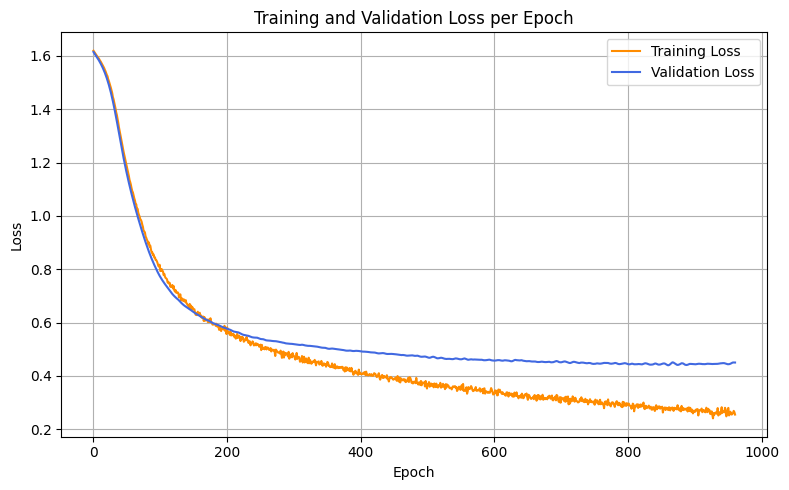

In [58]:
net = Net()

# Convert training and validation data to PyTorch tensors
x_train_tensor = torch.from_numpy(X_train_scaled).float()
y_train_tensor = torch.from_numpy(y_train.values).long()
x_val_tensor = torch.from_numpy(X_test_scaled).float()
y_val_tensor = torch.from_numpy(y_test.values).long()

# Optimizer and loss function

optimizer = torch.optim.AdamW(net.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

# Store training and validation losses
train_losses = []
val_losses = []

# Early stopping parameters
best_val_loss = float('inf')
patience = 100
epochs_no_improve = 0
best_model_state = None

# Training loop
max_epochs = 1000
for epoch in range(max_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    net.eval()
    with torch.no_grad():
        val_outputs = net(x_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
    
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_state = net.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"\nEarly stopping triggered at epoch {epoch+1}")
        break

# Load best model weights
if best_model_state is not None:
    net.load_state_dict(best_model_state)

# Final evaluation
net.eval()
with torch.no_grad():
    # Training metrics
    train_preds = net(x_train_tensor).argmax(dim=1).numpy()
    train_labels = y_train_tensor.numpy()
    train_acc = accuracy_score(train_labels, train_preds)

    # Validation metrics
    val_preds = net(x_val_tensor).argmax(dim=1).numpy()
    val_labels = y_val_tensor.numpy()
    val_acc = accuracy_score(val_labels, val_preds)
    val_precision = precision_score(val_labels, val_preds, average='weighted')
    val_recall = recall_score(val_labels, val_preds, average='weighted')
    val_f1 = f1_score(val_labels, val_preds, average='weighted')

# Print final metrics
print("\nFinal Evaluation Metrics:")
print(f"Training Accuracy:  {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall:    {val_recall:.4f}")
print(f"Validation F1-Score:  {val_f1:.4f}")

# Optional: print classification report
print("\nClassification Report (Validation):")
print(classification_report(val_labels, val_preds))

# Plot training and validation loss curves
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Training Loss', color='darkorange')
plt.plot(val_losses, label='Validation Loss', color='royalblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Random Forest

Random Forest test set accuracy: 0.8740

"CN": 0,     # Cognitively Normal - Cognitivamente Normal
"EMCI": 1,   # Early Mild Cognitive Impairment - Comprometimento Cognitivo Leve Inicial
"LMCI": 2,   # Late Mild Cognitive Impairment - Comprometimento Cognitivo Leve Avançado
"SMC": 3,    # Significant Memory Concern - Preocupação Significativa com a Memória
"AD": 4,     # Alzheimer's Disease - Doença de Alzheimer

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       101
           1       0.84      0.93      0.88        90
           2       0.91      0.91      0.91       151
           3       0.77      0.78      0.78        69
           4       0.90      0.88      0.89        73

    accuracy                           0.87       484
   macro avg       0.87      0.87      0.87       484
weighted avg       0.88      0.87      0.87       484



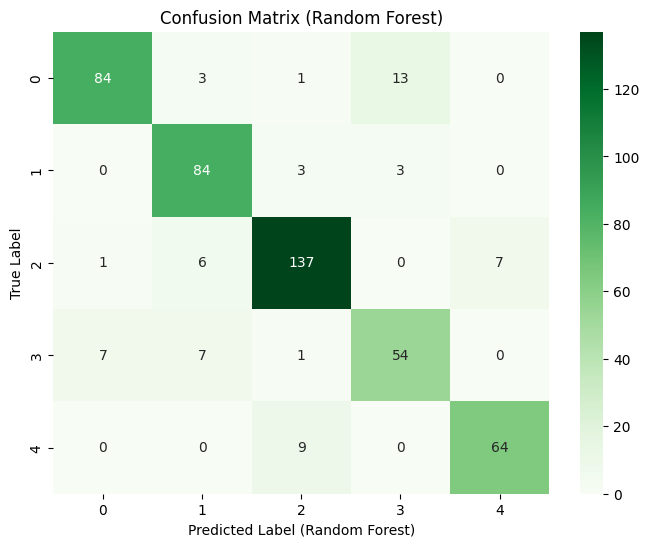

In [23]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest test set accuracy: {accuracy_rf:.4f}")

print('''
"CN": 0,     # Cognitively Normal - Cognitivamente Normal
"EMCI": 1,   # Early Mild Cognitive Impairment - Comprometimento Cognitivo Leve Inicial
"LMCI": 2,   # Late Mild Cognitive Impairment - Comprometimento Cognitivo Leve Avançado
"SMC": 3,    # Significant Memory Concern - Preocupação Significativa com a Memória
"AD": 4,     # Alzheimer's Disease - Doença de Alzheimer''')

# Display the classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label (Random Forest)')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

#### Gradient Boosting

gradientBoosting test set accuracy: 0.9029

"CN": 0,     # Cognitively Normal - Cognitivamente Normal
"EMCI": 1,   # Early Mild Cognitive Impairment - Comprometimento Cognitivo Leve Inicial
"LMCI": 2,    # Late Mild Cognitive Impairment - Comprometimento Cognitivo Leve Avançado
"SMC": 3,    # Significant Memory Concern - Preocupação Significativa com a Memória
"AD": 4,     # Alzheimer's Disease - Doença de Alzheimer

Classification Report (gradientBoosting):
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       101
           1       0.90      0.93      0.92        90
           2       0.93      0.94      0.94       151
           3       0.79      0.87      0.83        69
           4       0.93      0.90      0.92        73

    accuracy                           0.90       484
   macro avg       0.90      0.90      0.90       484
weighted avg       0.90      0.90      0.90       484



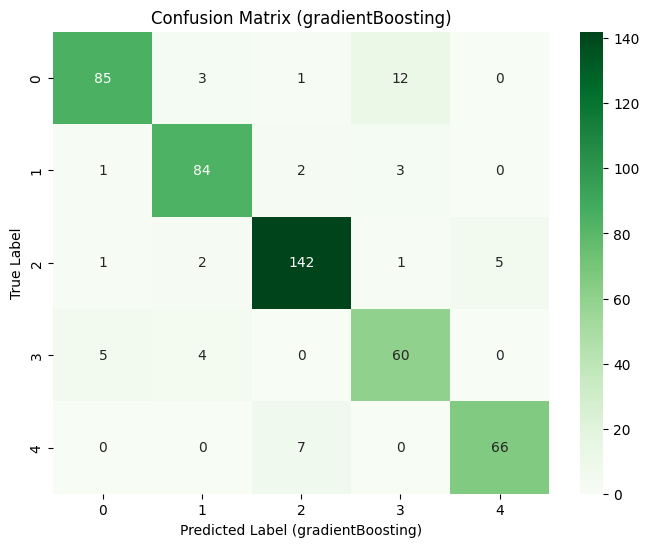

In [25]:
gBosting_model = GradientBoostingClassifier(random_state=42, learning_rate=0.17)
gBosting_model = gBosting_model.fit(X_train_scaled, y_train)

y_pred_gBoost = gBosting_model.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_gBoost)
print(f"gradientBoosting test set accuracy: {accuracy_rf:.4f}")

print('''
"CN": 0,     # Cognitively Normal - Cognitivamente Normal
"EMCI": 1,   # Early Mild Cognitive Impairment - Comprometimento Cognitivo Leve Inicial
"LMCI": 2,    # Late Mild Cognitive Impairment - Comprometimento Cognitivo Leve Avançado
"SMC": 3,    # Significant Memory Concern - Preocupação Significativa com a Memória
"AD": 4,     # Alzheimer's Disease - Doença de Alzheimer''')

# Display the classification report
print("\nClassification Report (gradientBoosting):")
print(classification_report(y_test, y_pred_gBoost))

# Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_gBoost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label (gradientBoosting)')
plt.ylabel('True Label')
plt.title('Confusion Matrix (gradientBoosting)')
plt.show()